## Notebook 5B  - Mon/Tues
### Numerical integration of functions and data
### Total points: 8
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Task 0: Conceptual and math questions about numerical integrals
You can answer these questions on pencil and paper with an image of your work, or you can answer in Markdown and LaTeX.

<img src="Numerical_integral_diagram.PNG" alt="Diagram showing 4 data points of position vs time" width = 400 />

In terms of the time and position coordinates $(t_0,y_0),...(t_3,y_3)$ answer the following questions related to the diagram.
1. How would you calculate the area under the curve during the **first** time interval?
1. How would you calculate the area Under the curve during the **second** time interval?
1. How would you calculate the area Under the curve during the **third** time interval?
1. How would you calculate the area Under the curve during the **$i$-th** time interval? Generalize your previous results.
1. If you have 4 data points as shown in the picture, how many little areas $A_i$ can you calculate? Why?
1. If you have $N$ data points, how many little areas $A_i$ can you calculate? Why?

# Task 1: Numerical integration using a `for` loop

Fix the three lines of code below to numerically integrate the function $f(t) = \cos(t)$ from 0 to $2\pi$.
$$ F(t) = \int^{t}_0 \cos(t') dt'$$

1. **Update the lines** that have some code that needs to be updated
1. **Add comments** to the lines that don't have any
1. Make sure your plot of $f(t)$ and $F(t)$ makes sense

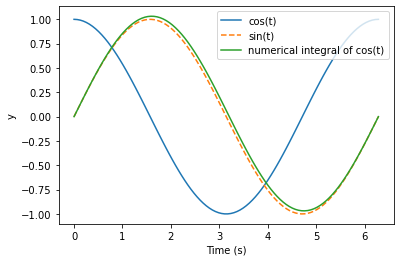

In [4]:
""" Numerically integrate cos(t) using a for loop """

t = np.linspace(0,2*np.pi,100)
y = np.cos(t)

F_list = []  # F is the anti-derivate (integral) of f(t)
F = 0  # initial value of integral 
F_list.append(F)  # append the initial value

for i in range(0, len(t) - 1):
    dt = 0  # FIX THIS LINE to be Delta t for the i-th step
    dF = 0  # FIX THIS LINE to be the change in F during i-th step
    F = 0   # FIX THIS LINE to be the final value of integral, F, after the i-th step
    F_list.append(F)
    
sin_integral = np.array(F_list)

### BEGIN SOLUTION

F_list = []  # F is the anti-derivate (integral) of f(t)
F = 0  # initial value of integral 
F_list.append(F)  # append the initial value

for i in range(0, len(t) - 1):
    dt = t[i+1] - t[i]
    dF = y[i]*dt
    F = F + dF
    F_list.append(F)

sin_integral = np.array(F_list)
### END SOLUTION
plt.plot(t, y, label = "cos(t)")
plt.plot(t, np.sin(t), '--', label="sin(t)")    
plt.plot(t, F_list, label="numerical integral of cos(t)")
plt.xlabel("Time (s)")
plt.ylabel("y")
plt.legend()



In [5]:
""" Check the numerically integrated result """

assert len(t) == len(sin_integral)
assert abs(sin_integral[0]) < 2* (2* np.pi/len(t))
assert abs( max(sin_integral) - 1) < 3*np.pi/len(t)
assert abs( min(sin_integral) - (-1)) < 3*np.pi/len(t)

# Task 2: Integrate a function of your own choosing using the `for` loop method
* Pick a function that you can integrate exactly (or look up the integral). Don't pick $\sin(t)$ or $\cos(t)$.
* **Create a plot** showing the
    1. Original function
    1. Numerical integral
    1. Exact integral
* Store the numerical integral in an array **`integral_numerical`**
* Store the exact integral in an array **`integral_exact`**
* The lengths of the three arrays should be the same.

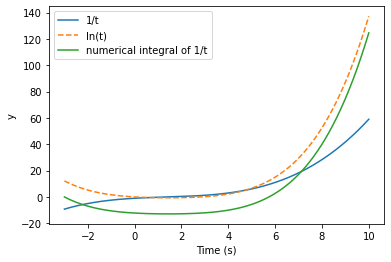

In [6]:
""" Numerically integrate a function of your own choosing """

### BEGIN SOLUTION
#t = np.linspace(0, 2*np.pi,100)
#y = np.exp(-t) * np.cos(5*t)

#t = np.linspace(0.1, 10,100)
#y = 1/t
#integral_exact = np.log(t)

t = np.linspace(-3, 10,1000)
y = (-1 + t - t**2 / 3 + t**3 / 12)
integral_exact = -t + 0.5*t**2  - 1/9 * t**3 + 1/48 * t**4

F_list = []  # F is the anti-derivate (integral) of f(t)
F = 0  # initial value of integral 
F_list.append(F)  # append the initial value

for i in range(0, len(t) - 1):
    dt = t[i+1] - t[i]
    dF = y[i]*dt
    F = F + dF
    F_list.append(F)

integral_numerical = np.array(F_list)


plt.plot(t, y, label = "1/t")
plt.plot(t, integral_exact, '--', label="ln(t)")    
plt.plot(t, integral_numerical, label="numerical integral of 1/t")
plt.xlabel("Time (s)")
plt.ylabel("y")
plt.legend()

### END SOLUTION


In [7]:
""" Autograder test for your own integral 
You MUST have a plot. If your plot doesn't make sense, or is missing labels, you will lose partial credit.
"""
assert len(integral_exact) == len(integral_numerical)

print( np.std(integral_numerical - integral_exact) )
print( np.std(integral_exact) )
assert np.std(integral_numerical - integral_exact)/ np.std(integral_exact) < 0.01

0.10634866809852064
33.063659618748254


# Review of the `np.cumsum()` function
`cumsum()` is the "cumulative summation" function. 
The input is an array, and the output is an array. An example may help.

In [8]:
x = np.arange(0,11,1)  
print(x)
y = np.cumsum(x)
print (y)

z = x.cumsum()  
print(z)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  3  6 10 15 21 28 36 45 55]
[ 0  1  3  6 10 15 21 28 36 45 55]


# Numerical integration using the "array method" and `np.cumsum()`

Text(0, 0.5, 'y')

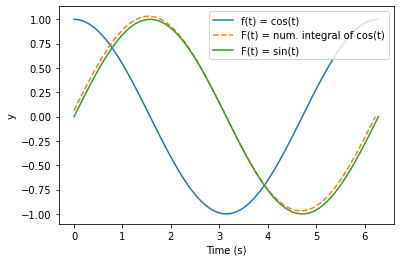

In [9]:
""" Numerically integrate cos(t) using the array method """

t = np.linspace(0,2*np.pi,100)
y = np.cos(t)

dt = t[1:] - t[0:-1]
dF = y[0:-1] * dt
F = dF.cumsum()

plt.plot( t, y , label = "f(t) = cos(t)")
plt.plot( t[0:-1] ,F , '--', label = "F(t) = num. integral of cos(t)")
plt.plot( t, np.sin(t) , label = "F(t) = sin(t)")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("y")

# Task 3: Explain how the "array" method of integration works .
* For the example code above, explain the three lines of code that are uncommented on lines 6,7, and 8. 
* Specifically, justify each array index used to calculate `dt` and `dF`. 

# Task 4: Integrate a function of your own choosing using the "array method"
* Pick a function that you can integrate exactly (or look up the integral). Don't pick any of the previous examples.
* Create a plot showing the
    1. Original function
    1. Numerical integral
    1. Exact integral
* Store the numerical integral in an array **`integral_numerical_2`**
* Store the exact integral in an array **`integral_exact_2`**
* The length of `integral_numerical_2` might be one less than the length of the exact integral. 

Text(0, 0.5, 'y')

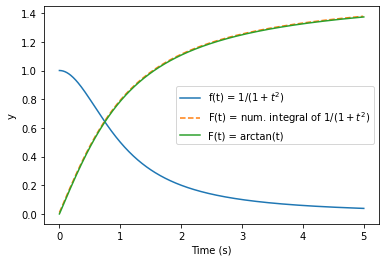

In [10]:
""" Solution for integration using the array method """

### BEGIN SOLUTION
t = np.linspace(0,5,487)
y = 1/(1+t**2)

dt = t[1:] - t[0:-1]
dF = y[0:-1] * dt
F = dF.cumsum()

integral_numerical_2 = F
integral_exact_2 = np.arctan(t)
plt.plot( t, y , label = "f(t) = $1/(1+t^2)$")
plt.plot( t[0:-1] ,integral_numerical_2 , '--', label = "F(t) = num. integral of $1/(1+t^2)$")
plt.plot( t, integral_exact_2 , label = "F(t) = arctan(t)")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("y")
### END SOLUTION

In [11]:
""" Autograded test cases for integration using the array method """
n = len(integral_exact_2) - len(integral_numerical_2)
assert n == 0 or n == 1

if n == 1 : 
    print( np.std(integral_numerical_2 - integral_exact_2[:-1]) )
    print( np.std(integral_exact_2[:-1]) )
    assert np.std(integral_numerical_2 - integral_exact_2[:-1])/ np.std(integral_exact_2[:-1]) < 0.01
if n == 0 : 
    print( np.std(integral_numerical_2 - integral_exact_2) )
    print( np.std(integral_exact_2) )
    assert np.std(integral_numerical_2 - integral_exact_2)/ np.std(integral_exact_2) < 0.01

0.0014680246257547092
0.3509191860691597


# Task 5: Add your data from Monday/Tuesday to the PS6A folder, read it into a numpy array
* Add the data `my_acceleration_data.csv` from PS5A to the PS56A folder (we continue our analysis today)
* Load the data into an array named `my_acc` 

In [12]:
"""
Load my_acceleration_data.csv into an array named my_acc.
"""

### BEGIN SOLUTION
# acceleration data: 3 -> A -> 3 (I was only rider, phone on floor)
my_acc = np.loadtxt("my_acceleration_data.csv", delimiter = ",", skiprows=1)

### END SOLUTION

In [13]:
""" Check imported arrays my_press and my_acc """

assert my_acc.shape[1] >= 4 # acceleration data should have five columns
assert my_acc.shape[0] > 20 # acceleration data should have lots of rows

# Picking out an array subset based on a condition
In order to numerically integrate your smartphone data, it is a good idea to restrict the analysis to a subset near when the elevator either started moving or stopped moving.

Here is an example of how to take a subset based on the time column of data.

[ True  True  True  True  True]
[False False False False False] 

Length of y       =  3000
Length of y_small =  279


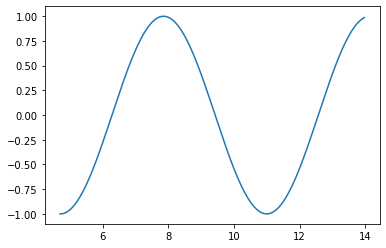

In [14]:
"""Example code on picking out a subset based on a condition"""

t = np.linspace(0,100,3000)  # go from 0 to 100 in 3000 steps.
y = np.sin(t)

condition1 = t < 14    # boolean array, True when t < 14
print(condition1[0:5])   # first 5 elements

condition2 = t > 4.7  # boolean array, True when t > 4.7
print(condition2[0:5], "\n")

# true when both conditions are met, false otherwise
condition = np.logical_and(condition1, condition2)  # return true when both are true

t_small = t[condition]
y_small = y[condition]

plt.plot(t_small, y_small)


print("Length of y       = ", len(y))
print("Length of y_small = ", len(y_small))

# Task 6: Plot your acceleration data
* Only plot the component of the acceleration that was in the vertical direction. For most people this will be $z$-axis if the phone's screen was parallel to the floor.
* Find a subset of data where the **elevator starts moving**. Use the method above to take a "subset based on a condition". Store the time and $a_z$ values in two arrays.
    * **`t_start`**
    * **`az_start`**
* Create a plot of the subset of data when the elevator was starting.  **`plt.grid()`** adds grid lines. Your plot should be similar to this one, though it could vary depending on whether you went up or down, and whether you used the Gosnell or Wallace Center elevator.    
![z-acceleration as elevator starts moving](a_z_elevator_start_example.png)

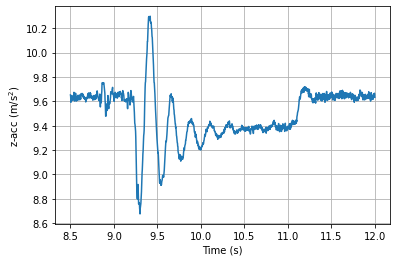

In [15]:
""" ZOOM in on time segments when the elevator started and stopped """

### BEGIN SOLUTION
condition1 = my_acc[:,0] < 12
condition2 = my_acc[:,0] > 8.5
condition = np.logical_and(condition1, condition2)

t_start = my_acc[:,0][condition]
az_start = my_acc[:,3][condition]
plt.plot(t_start, az_start) 
plt.xlabel("Time (s)")
plt.ylabel("z-acc (m/s$^2$)")
plt.grid()
#plt.savefig("a_z_elevator_start_example.png")
### END SOLUTION

In [16]:
""" Autograded test for Task 6
You MUST produce a plot with appropriate labels to get full credit. """

assert len(t_start) > 10 
assert len(az_start) > 10


# Task 7: Calculate the elevator's velocity $v(t)$ as it starts moving from rest.

All calculations in Task 7 will be based upon the two array subsets `t_start` and `az_start` that were created in the previous task.

1. Create a float variable `az_background` as your estimate of the background acceleration when the phone is at rest.
1. Subtract off the "background acceleration" and store the result in an array `az_sub`
1. Calculate $v(t)$ by integrating your acceleration data over the subset of times where the elevator starts moving. 
1. Create a plot of velocity vs time.
1. Store the final velocity of the elevator in a float variable named `v_final_elevator`?

**Example plot**
![Example velocity vs time for elevator starting](Vel_vs_time_example.png)

length of vel_list =  1497
length of t array =  3000
v_final_elevator =  -0.4676144579688054


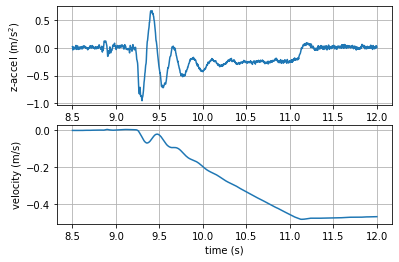

In [17]:
""" Calculate the velocity change while the elevator was accelerating """

# Make sure to use the arrays t_start and az_start, which were defined above.

# Make sure to subtract off the "background acceleration"

### BEGIN SOLUTION
vel_list = []  # 
az_background = 9.63
az_sub = az_start - az_background

v = 0  # initial velocity of the elevator
vel_list.append(v)
for i in range(0, len(t_start) - 1) :
    dt = t_start[i+1] - t_start[i]
    v = v + az_sub[i] *dt
    vel_list.append(v)
    
vel_array = np.array(vel_list)
print("length of vel_list = ",len(vel_list))
print("length of t array = ", len(t))

v_final_elevator = vel_array[-1]
print("v_final_elevator = ", v_final_elevator)

plt.subplot(2,1,1)
plt.plot(t_start, az_sub)
plt.ylabel("z-accel (m/s$^2$)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot( t_start, vel_list, label = "$v_y$")
plt.ylabel("velocity (m/s)")
plt.xlabel("time (s)")
plt.grid()
#plt.savefig("Vel_vs_time_example.png")
### END SOLUTION

In [18]:
""" Autograded test cases for Task 7
You must include a plot with appropriate labels."""

assert az_background < 10.2 and az_background > 9.4
print(len(az_sub) )
assert len(az_sub) == len(az_start)
assert abs( np.mean(az_sub) ) < 0.3  # the mean value of the background subtracted az should be small
print("v_final_elevator = ", v_final_elevator)
assert abs(v_final_elevator) < 2  # Gosnell should be about 0.5 m/s

1497
v_final_elevator =  -0.4676144579688054
